<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/lidar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/validation/lidar/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))
print(df.columns)

                                                                 key.segment_context_name  \
index                                                                                       
6074871217133456543_1000_000_1020_000;155318425...  6074871217133456543_1000_000_1020_000   
6074871217133456543_1000_000_1020_000;155318425...  6074871217133456543_1000_000_1020_000   
6074871217133456543_1000_000_1020_000;155318425...  6074871217133456543_1000_000_1020_000   
6074871217133456543_1000_000_1020_000;155318425...  6074871217133456543_1000_000_1020_000   
6074871217133456543_1000_000_1020_000;155318425...  6074871217133456543_1000_000_1020_000   
6074871217133456543_1000_000_1020_000;155318425...  6074871217133456543_1000_000_1020_000   
6074871217133456543_1000_000_1020_000;155318425...  6074871217133456543_1000_000_1020_000   
6074871217133456543_1000_000_1020_000;155318425...  6074871217133456543_1000_000_1020_000   
6074871217133456543_1000_000_1020_000;155318425...  607487121713345654

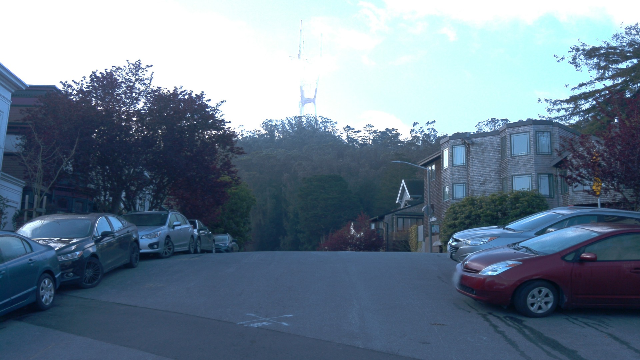

In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/validation/camera_image/6074871217133456543_1000_000_1020_000.parquet'

# Load the Parquet file into a Pandas DataFrame
camera_image = pd.read_parquet(parquet_file_path)

# Extract the camera image
img = camera_image.iloc[0]['[CameraImageComponent].image']

# Convert the camera image from bytes to a NumPy array
nparr = np.frombuffer(img, np.uint8)
img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

# Resize the image
resized_img = cv2.resize(img_np, (640, 360))

# Display the resized image
cv2_imshow(resized_img)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # For visualization
from io import BytesIO
import os

# Load the camera box data from the first parquet file
df_lidar = pd.read_parquet('/content/drive/MyDrive/validation/lidar/file1.parquet')

# Load camera image data from the parquet file (similar to what you did before)
df_image = pd.read_parquet('/content/drive/MyDrive/validation/camera_image/6074871217133456543_1000_000_1020_000.parquet')

# Set the desired frame timestamp
frame_timestamp = 1553184256373349

# Find the row in the LiDAR DataFrame that corresponds to the desired frame timestamp
df_lidar_frame = df_lidar[df_lidar['key.frame_timestamp_micros'] == frame_timestamp]

# Extract the LiDAR range values for visualization and reshape them
lidar_range_values_1_flat = df_lidar_frame['[LiDARComponent].range_image_return1.values'].values[0]
lidar_range_values_1 = lidar_range_values_1_flat.reshape((height, width))  # Reshape to match the image dimensions

# Extract the LiDAR range values for the second return and reshape them
lidar_range_values_2_flat = df_lidar_frame['[LiDARComponent].range_image_return2.values'].values[0]
lidar_range_values_2 = lidar_range_values_2_flat.reshape((height, width))  # Reshape to match the image dimensions

# Assuming you have camera data similar to your previous example
# Find the row in the camera image DataFrame that corresponds to the desired frame timestamp
df_image_frame = df_image[df_image['key.frame_timestamp_micros'] == frame_timestamp]

# Read the camera image binary data into a stream (similar to your previous example)
img_stream = BytesIO(df_image_frame.iloc[0]['[CameraImageComponent].image'])

# Open the image using a library of your choice (e.g., PIL or OpenCV)
# Perform any required resizing or transformations to match the LiDAR data resolution

# Visualize the LiDAR data (assuming you are using matplotlib)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(lidar_range_values_1, cmap='viridis')  # Adjust cmap as needed
plt.title('LiDAR Range Image Return 1')

plt.subplot(1, 2, 2)
plt.imshow(lidar_range_values_2, cmap='viridis')  # Adjust cmap as needed
plt.title('LiDAR Range Image Return 2')

# Show the matched camera image with LiDAR range images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(camera_image)  # Show your camera image

plt.subplot(1, 2, 2)
plt.imshow(lidar_range_values_1, cmap='viridis')  # Show LiDAR data for comparison

plt.show()


In [ ]:
import pandas as pd
import os

folder_path = "/content/drive/MyDrive/validation/camera_image"
desired_timestamp = 1553184256373349

for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path) and file_name.endswith(".parquet"):
        df = pd.read_parquet(file_path)
        if desired_timestamp in df['key.frame_timestamp_micros'].values:
            print(f"Desired timestamp found in {file_name}")
        else:
            print(f"Desired timestamp not found in {file_name}")
